In [10]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import plotnine as p9

from ppptm.bspline.onion import OnionKnots, OnionSpline
from ppptm.nodes.ppvar_rw import GPTMCoef
from ppptm.util.locs import unit_grid_vars

jax.config.update("jax_enable_x64", True)

In [11]:
D = 10
knots = OnionKnots(-4.0, 4.0, nparam=D).knots
bs = OnionSpline(knots)

In [42]:
locs = unit_grid_vars()
coef = GPTMCoef.sample_array(
    locs=locs,
    nparam=D,
    n=1,
    length_scale=0.1,
    amplitude=0.05,
)
# coef = jnp.swapaxes(coef, 0, 1)
print(coef.shape)

(1, 100, 10)


In [55]:
xgrid = jnp.linspace(-8.0, 8.0, 300)
x = jnp.expand_dims(xgrid, -1)
x = jnp.tile(x, (1, locs.locs.nloc))
x.shape

(300, 100)

In [ ]:
fx, fx_deriv = bs.dot_and_deriv(x, coef.squeeze())
print(fx.shape)
print(fx_deriv.shape)

(300, 100)
(300, 100)


In [ ]:
locsdf = pd.DataFrame(locs.locs.ordered, columns=["lon", "lat"]).reset_index(
    names="loc"
)

In [58]:
nobs, nloc = fx.shape

fx_long = jnp.reshape(fx, (nobs, nloc))
df = pd.DataFrame(fx_long)
df["x"] = xgrid
df["nobs"] = np.arange(x.shape[0])
df = df.melt(id_vars=["x", "nobs"], var_name="loc")
# df["sample"] = np.repeat(np.arange(nsamp), )
df = pd.merge(df, locsdf, on="loc")
df["loc"] = df["loc"].astype(int)
df

,x,nobs,loc,value,lon,lat
0,-8.000000,0,0,-8.000000,0.444444,0.444444
1,-7.946488,1,0,-7.946488,0.444444,0.444444
2,-7.892977,2,0,-7.892977,0.444444,0.444444
3,-7.839465,3,0,-7.839465,0.444444,0.444444
4,-7.785953,4,0,-7.785953,0.444444,0.444444
...,...,...,...,...,...,...
29995,7.785953,295,99,7.785953,1.000000,0.666667
29996,7.839465,296,99,7.839465,1.000000,0.666667
29997,7.892977,297,99,7.892977,1.000000,0.666667
29998,7.946488,298,99,7.946488,1.000000,0.666667


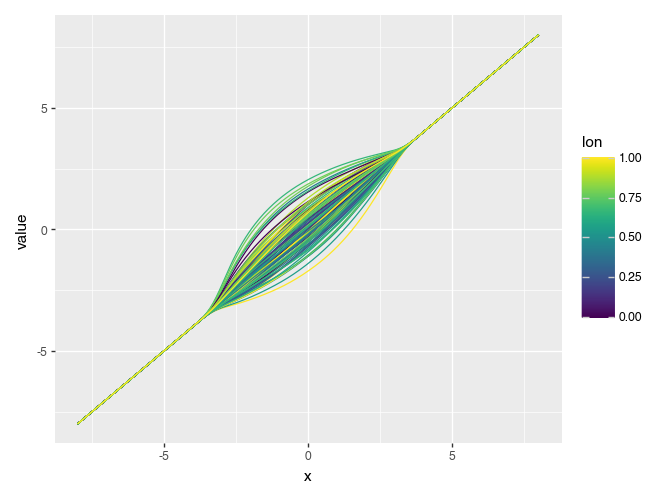

In [59]:
(p9.ggplot(df) + p9.geom_line(p9.aes("x", "value", group="loc", color="lon")))

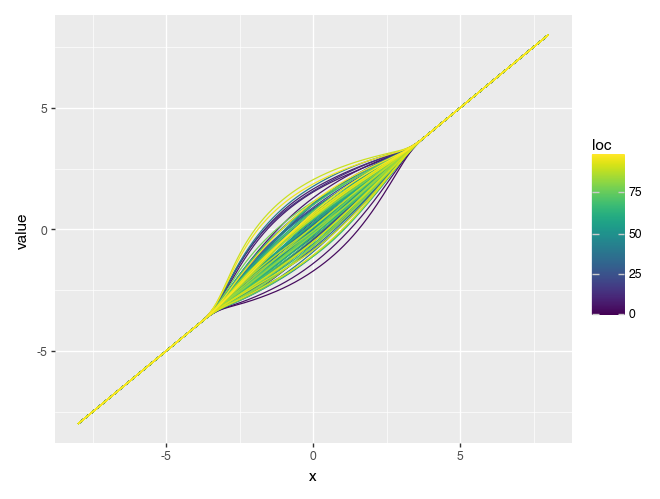

In [60]:
(p9.ggplot(df) + p9.geom_line(p9.aes("x", "value", group="loc", color="loc")))

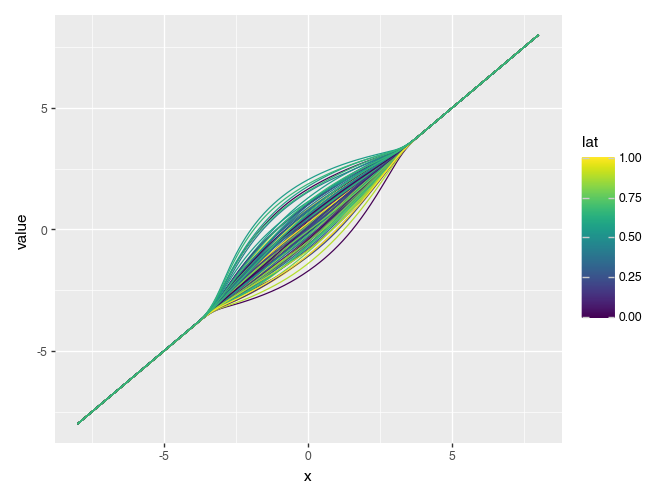

In [61]:
(p9.ggplot(df) + p9.geom_line(p9.aes("x", "value", group="loc", color="lat")))